In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
heart_dataset = pd.read_csv('./Heart_Disease_Dataset.csv')

In [3]:
heart_dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
heart_dataset.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [5]:
heart_dataset.shape

(1190, 12)

In [6]:
heart_dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
heart_dataset['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

In [8]:
missings = heart_dataset.isnull().values.any()
if not missings: x = "not"
print(f"Dataset has {x} missing value")

Dataset has not missing value


In [9]:
is_ballanced = np.abs(heart_dataset['target'].count() - 2 * heart_dataset['target'].sum()) < 100
print(f"ballanced: {is_ballanced}")

ballanced: True


--------------------- Plots --------------------------



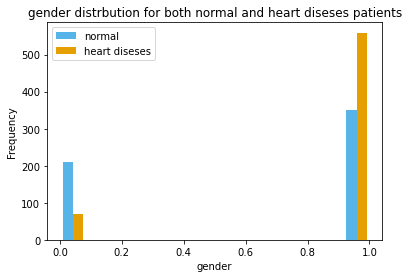

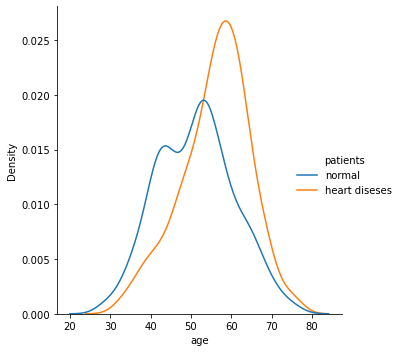

In [10]:
print("--------------------- Plots --------------------------\n")
colors = ['#56B4E9', '#E69F00']
names = ['normal', 'heart diseses']
plt.hist([heart_dataset[heart_dataset.target == 0]['sex'], heart_dataset[heart_dataset.target == 1]['sex']], bins = int(180/15),color = colors, label=names)
plt.legend()
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('gender distrbution for both normal and heart diseses patients')
age_plot = sns.displot(heart_dataset, x="age", hue="target", kind="kde")
age_plot._legend.set_title("patients")
age_plot.set_titles("age distrbution for both normal and heart diseses patients")
new_labels = ['normal', 'heart diseses']
for t, l in zip(age_plot._legend.texts, new_labels): t.set_text(l)

In [11]:
heart_dataset.groupby('target').mean()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
target,,,,,,,,,,,
0,51.124777,0.623886,2.777184,129.793226,231.657754,0.119430,0.631016,150.894831,0.139037,0.464706,1.297683
1,56.034976,0.888712,3.639110,134.259141,191.372019,0.297297,0.758347,129.777424,0.608903,1.331320,1.915739


In [12]:
X = heart_dataset.drop(columns = 'target', axis=1)
Y = heart_dataset['target']

In [13]:
print(X)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [14]:
print(Y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standardized_data = scaler.transform(X)

In [18]:
print(standardized_data)

[[-1.46672783  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 [-0.50460037 -1.79857595 -0.24893198 ... -0.79521891  0.07111913
   0.61558278]
 [-1.78743698  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 ...
 [ 0.35062404  0.55599543  0.82048698 ...  1.25751537  0.25530143
   0.61558278]
 [ 0.35062404 -1.79857595 -1.31835093 ... -0.79521891 -0.84979236
   0.61558278]
 [-1.68053393  0.55599543 -0.24893198 ... -0.79521891 -0.84979236
  -1.02321701]]


In [19]:
X = standardized_data
Y = heart_dataset['target']

In [20]:
print(X)
print(Y)

[[-1.46672783  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 [-0.50460037 -1.79857595 -0.24893198 ... -0.79521891  0.07111913
   0.61558278]
 [-1.78743698  0.55599543 -1.31835093 ... -0.79521891 -0.84979236
  -1.02321701]
 ...
 [ 0.35062404  0.55599543  0.82048698 ...  1.25751537  0.25530143
   0.61558278]
 [ 0.35062404 -1.79857595 -1.31835093 ... -0.79521891 -0.84979236
   0.61558278]
 [-1.68053393  0.55599543 -0.24893198 ... -0.79521891 -0.84979236
  -1.02321701]]
0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1190, 11) (952, 11) (238, 11)


In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8361344537815126


In [27]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8319327731092437


In [30]:
input_data = (37,1,4,140,207,0,0,130,1,1.5,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person does not have heart disease')
else:
    print('The person have heart disease')

[[-1.78743698  0.55599543  0.82048698  0.42732826 -0.03318146 -0.52092948
  -0.80267229 -0.38157395  1.25751537  0.53157488  0.61558278]]
[1]
The person have heart disease


In [30]:
classifier = svm.SVC(kernel='poly')

In [31]:
classifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [32]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9033613445378151
